# <center> Supervised learning: Classification with Titanic dataset </center>

## 1. Data types

![](https://miro.medium.com/max/1200/0*tZj7CTvSzNcjnISR)

## 2. Classification vs Regression
||Regression|Clasification|
|-|-|-|
|Data|Attribute-value description|Attribute-value description|
|Target|Continuous|Nominal|
|Evaluation methods|Cross-validation, train test split ...|Cross-validation, train test split ...|
|Errors|MSE, MAE, RMSE|1-accuracy|
|Algorithms|Linear regression|Decision Tree, Naive Bayes ...|
|Baseline|Mean of target|Majority class|

## 3. Titanic dataset

|Variable| Definition| Key|
|-|-|-|
|survived| Survival| 0 = No, 1 = Yes|
|pclass| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex| Male or Female||
|age| Age in years||
|sibsp| # of siblings / spouses aboard the Titanic||
|parch| # of parents / children aboard the Titanic||
|fare| Passenger fare||
|embarked| Port of Embarkation|  C=Cherbourg, Q=Queenstown, S=Southampton|
|deck|||

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.isna().sum() #tính %: titanic.isna().sum()*100 /len(titanic)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### => ***Chứa NA***

# I. XỬ LÝ NA

## *a) AGE*

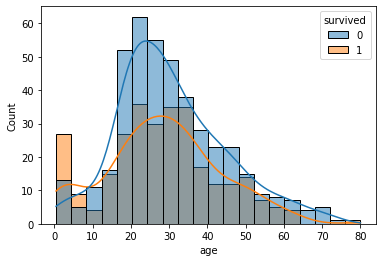

In [5]:
sns.histplot(titanic,x='age',hue='survived',kde=True) #kde:hiện đường phân phối của survived)
plt.show()

### Xử lý NA

### Đặt ra các giả thuyết để xử lý Missing values

### GT1: Higher fare, better life chance (tiền nhiều, cơ hội sống cao hơn, có tiền là ít bị chết hơn)

<function matplotlib.pyplot.show(close=None, block=None)>

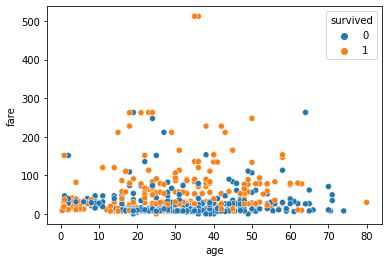

In [6]:
sns.scatterplot(data=titanic,x='age',y='fare',hue='survived')
plt.show

### GT2: Đánh giá qua sibsp (of siblings / spouses aboard the Titanic (số ae đi kèm)), và parch (of parents / children aboard the Titanic(số phụ huynh đi kèm))

<function matplotlib.pyplot.show(close=None, block=None)>

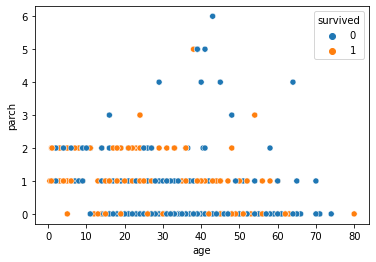

In [7]:
sns.scatterplot(data=titanic,x='age',y='parch',hue='survived')
plt.show

In [8]:
titanic['sibsp'].value_counts()#check số lượng ae đi cùng

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [9]:
titanic['parch'].value_counts()#check số lượng PH đi cùng

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

###### Có những người mà có 6 người trong gđ đi cùng

<function matplotlib.pyplot.show(close=None, block=None)>

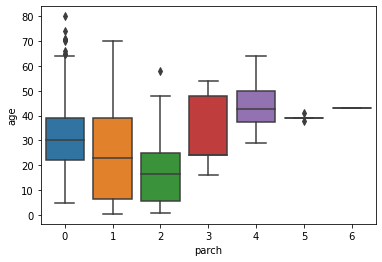

In [10]:
sns.boxplot(data=titanic,x='parch',y='age')
plt.show

#### *Nhận xét*: Chứa giá trị ngoại lai, bị lệch phải

<function matplotlib.pyplot.show(close=None, block=None)>

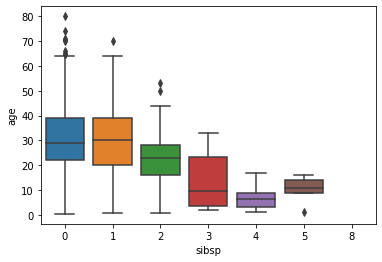

In [11]:
sns.boxplot(data=titanic,x='sibsp',y='age')
plt.show

In [12]:
titanic.sex.unique()#check xem trong biến sexcos những giá trị nào

array(['male', 'female'], dtype=object)

In [13]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

### Xem độ tuổi trung bình trong các cụm who và sibpr, parch

In [14]:
titanic.groupby(['who','sibsp','parch']).age.mean()

who    sibsp  parch
child  0      0        12.166667
              1         6.052500
              2         4.981111
       1      0        13.900000
              1         4.566667
              2         5.274286
       2      1         2.300000
              2         9.000000
       3      1         4.333333
              2         6.250000
       4      1         5.625000
              2         6.125000
       5      2         8.750000
man    0      0        32.973597
              1        38.583333
              2        35.800000
       1      0        32.701923
              1        36.000000
              2        30.750000
              3        16.000000
              4        52.000000
              5        39.000000
       2      0        31.181818
              1        23.000000
       3      1              NaN
              2        19.000000
       4      1        16.000000
       8      2              NaN
woman  0      0        31.084211
              1        

In [15]:
#với mỗi cặp who, sinsp, parch thì số lượng bản ghi là bn, độ tuổi trung bình tương ứng vs mean vừa tính, tỉ lệ % missing đối vs nhóm này
titanic.groupby(['who','sibsp','parch']).age.agg([len,'mean',lambda x: (x.isnull().sum()/len(x))])

len       mean  <lambda_0>
who   sibsp parch                              
child 0     0        6.0  12.166667    0.000000
            1        8.0   6.052500    0.000000
            2        9.0   4.981111    0.000000
      1     0        5.0  13.900000    0.000000
            1       15.0   4.566667    0.000000
            2        7.0   5.274286    0.000000
      2     1        5.0   2.300000    0.000000
            2        1.0   9.000000    0.000000
      3     1        3.0   4.333333    0.000000
            2        4.0   6.250000    0.000000
      4     1        8.0   5.625000    0.000000
            2        8.0   6.125000    0.000000
      5     2        4.0   8.750000    0.000000
man   0     0      410.0  32.973597    0.260976
            1       12.0  38.583333    0.000000
            2        5.0  35.800000    0.000000
      1     0       59.0  32.701923    0.118644
            1       21.0  36.000000    0.095238
            2        5.0  30.750000    0.200000
            3        1.0  16.000000    0.000000
            4        2.0  52.000000    0.000000
            5        1.0  39.000000    0.000000
      2     0       13.0  31.181818    0.153846
            1        1.0  23.000000    0.000000
      3     1        1.0        NaN    1.000000
            2        1.0  19.000000    0.000000
      4     1        1.0  16.000000    0.000000
      8     2        4.0        NaN    1.000000
woman 0     0      121.0  31.084211    0.214876
            1       18.0  34.176471    0.055556
            2       15.0  26.833333    0.200000
            3        1.0  24.000000    0.000000
            4        1.0  29.000000    0.000000
            5        2.0  40.000000    0.000000
      1     0       59.0  33.355556    0.237288
            1       21.0  35.450000    0.047619
            2        7.0  31.333333    0.142857
            3        2.0  51.000000    0.000000
            4        1.0  45.000000    0.000000
            5        2.0  38.500000    0.000000
            6        1.0  43.000000    0.000000
      2     0        3.0  35.500000    0.333333
            1        1.0  24.000000    0.000000
            2        3.0  20.000000    0.000000
            3        1.0  24.000000    0.000000
      3     0        2.0  31.500000    0.000000
            1        3.0        NaN    1.000000
            2        2.0  23.500000    0.000000
      4     2        1.0  17.000000    0.000000
      5     2        1.0  16.000000    0.000000
      8     2        3.0        NaN    1.000000

##### - who, sib, parent:đếm có bn bản ghi
##### - tính trung bình
##### - tính tỉ lệ missing value

##### giá trị missing có thể thấy đc
##### child	0	0	6.0	12.166667	0.000000
##### => trẻ em, không có ace, k có gđ đi cùng, có 6 bản ghi, tuổi trung bình là 12.16, 0% missing value

In [16]:
ser = titanic.groupby(['who','sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

### gán ser vào cột age

In [17]:
titanic.age.isnull().sum()

177

In [18]:
titanic['age']=ser
titanic.age.isnull().sum()

11

#### Như vậy từ 177 NA xuống còn 11 giá trị NA. Nhưng vẫn còn 11 giá trị, giá trị đó là do cột Mean vẫn còn NA, vậy nên tiếp tục xử lý Missing values

In [19]:
ser = titanic.groupby(['sibsp','parch']).age.apply(lambda x: x.fillna(x.mean()))
titanic['age'] = ser
titanic.age.isnull().sum()

7

In [20]:
titanic.groupby(['sibsp','parch']).age.agg([len,'mean',lambda x: (x.isnull().sum()/len(x))])

len       mean  <lambda_0>
sibsp parch                              
0     0      537.0  32.315390         0.0
      1       38.0  29.647276         0.0
      2       29.0  21.597586         0.0
      3        1.0  24.000000         0.0
      4        1.0  29.000000         0.0
      5        2.0  40.000000         0.0
1     0      123.0  32.251148         0.0
      1       57.0  27.525439         0.0
      2       19.0  21.579123         0.0
      3        3.0  39.333333         0.0
      4        3.0  49.666667         0.0
      5        3.0  38.666667         0.0
      6        1.0  43.000000         0.0
2     0       16.0  31.991477         0.0
      1        7.0   8.357143         0.0
      2        4.0  17.250000         0.0
      3        1.0  24.000000         0.0
3     0        2.0  31.500000         0.0
      1        7.0   4.333333         0.0
      2        7.0  13.000000         0.0
4     1        9.0   6.777778         0.0
      2        9.0   7.333333         0.0
5     2        5.0  10.200000         0.0
8     2        7.0        NaN         1.0

#### Còn 1 giá trị NA. Cuối cùng sẽ xử lý bằng cách thay bằng giá trị trung bình

In [21]:
kid_avg_age = titanic[titanic['who']=='child'].age.mean()

In [22]:
titanic['age'] = titanic['age'].fillna(kid_avg_age)
titanic.age.isnull().sum()

0

### HẾT NULL Ở AGE

## *b) Embarked*

In [23]:
titanic['embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

#### có 644 bản ghi đi từ cảng S,
#### 168 người đi từ cảng C...

In [24]:
titanic[titanic['embarked'].isnull()] #check giá trị null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


#### class=First => giàu
#### sibsp=1 => ko đi cùng ai

### Lọc bản ghi có giới tính nữ, sống sót, đi 1 mình, sd hạng vé 1

In [ ]:
f1 = (titanic['survived']==1)
f2 = (titanic['pclass']==1)
f3 = (titanic['pclass']==0)
f4 = (titanic['sex']=='female')
f5 = (titanic['parch']==0)
titanic[f1 & f2 & f3 & f4 & f5]

### **Hoặc**

In [25]:
ser=titanic.query("survived==1 and pclass==1 and sibsp==0 and sex=='female' and parch==0")
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
11,1,1,female,58.000000,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
61,1,1,female,38.000000,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
218,1,1,female,32.000000,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
256,1,1,female,31.084211,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
269,1,1,female,35.000000,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
290,1,1,female,26.000000,0,0,78.8500,S,First,woman,False,NaN,Southampton,yes,True


In [26]:
#Tìm giá trị xuất hiện nhiều nhất trong cột embarked
ser['embarked'].mode()[0] #(truyền 0 vào là vì chỉ lấy mỗi chữ thôi)

'C'

#### Ngoài cách dùng mode như trên, có thể dùng value_counts để đếm số lượng bản ghi xuất hiện trong đấy, và lấy bản ghi có số lượng lớn nhất

In [27]:
ser['embarked'].value_counts() # số lượng xuất hiện của giá trị 

C    17
S    14
Name: embarked, dtype: int64

##### 17 là giá trị tần suất xuất hiện C

#### Nếu muốn lấy mỗi giá trị bản ghi thôi thì nhập thêm .idxmax()

In [28]:
ser['embarked'].value_counts().idxmax()

'C'

#### Xử lý NA bằng cách thêm vào giá trị tìm đc ở lệnh ser['embarked'].mode()[0] (là giá trị xuất hiện nhiều nhất trong cái cụm các bản ghi có cùng hành vi)

In [29]:
titanic['embarked']=titanic['embarked'].fillna(ser['embarked'].mode()[0]) #bước fill NA

In [30]:
titanic['embarked'].isnull().sum() #bước check NA

0

##### Vậy là đã hết NA ở biến Embarked

## *c) Deck (boong tàu)*

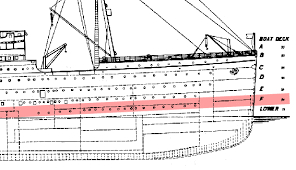

In [31]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
titanic.isnull().sum()/len(titanic)#check tỉ lệ null

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
có bn người sd hạng A, bn deck B, C,...
từ đó suy ra tập trung vào hạng vé nào

In [37]:
#groupby ~ pivot table
titanic.pivot_table(index='deck',
                    columns='pclass',
                   values='survived',#chỉ quan tâm những khách đang sống
                   aggfunc='count')#tuy nhiên chỉ xuất hiện %, nên muốn tính số lượng thì thêm aggfunc

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


In [ ]:
### hạng 1 tập trung ở khoang A-E, hạng 2, 3 tập trng nhiều ở khoang F-G

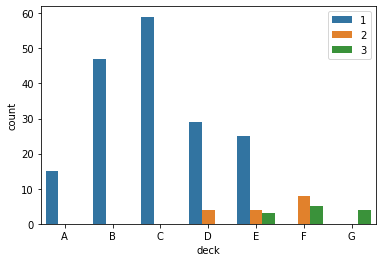

In [41]:
#visualization
sns.countplot(data=titanic, x='deck',hue='pclass')#nếu nhập y thì bị báo lỗi, sd tham số hue thay cho y
plt.legend(loc='upper right')
plt.show()

In [ ]:
##### vậy từ biểu đồ, những ai có pclass = 1 -> deck = C
##### pclass = 2,3 -> deck = F

In [45]:
deck_dict = {1: 'C',
            2:'F',
            3:'F'}
ser = titanic['pclass'].map(deck_dict)
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [46]:
# fill NA
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [49]:
titanic['deck'].value_counts(dropna=False) # thêm FALSE để check NA lúc chưa fill

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [53]:
titanic['deck'] = new_deck
titanic['deck'].value_counts(dropna=False)

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

##### Vậy những giá trị NA đã đc thay bằng F và C

In [54]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

##### Đã hết Null ở Deck

# II. Feature Engineering

**Discretization**
- Supervised:
    + Equal-width discretization (dùng pd.cut())
    + Equal-frequnet discretization (dùng pd.qcut())
- Unsupervised:
    + Entropy-based discretization
    
cách để nhóm các giá trị dữ liệu

In [ ]:
Tạo ra các feature riêng (đc đánh giá cho là meaningful)

In [56]:
titanic.age.describe()

count    891.000000
mean      29.945476
std       13.342194
min        0.420000
25%       22.000000
50%       31.084211
75%       35.000000
max       80.000000
Name: age, dtype: float64

##### tuổi từ 1-80

##### a) 

In [57]:
# vì trải dài từ 1-80t, nên sẽ chia các giá trị cho đều nhau, chia theo nhóm tuổi
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic.age, bins=age_groups)

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [59]:
titanic['age_group'] = pd.cut(titanic.age, bins=age_groups)
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]"


##### b)

In [60]:
#women + rich (pclass)
titanic['rich_women'] = (titanic['sex'] =='female') & (titanic['pclass']==1)
titanic['rich_women']

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: rich_women, Length: 891, dtype: bool

##### c) 

In [61]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

#### Cột fare có khoảng rất rộng, cần chuẩn hóa thành 1 range nhất định (đgl pp Feature Scaling)